# Product Sales Forecasting
- 5 weeks ahead forecast for each SKU (probably ony the total amount is needed?)
- business metric needed

Questions:
- daily vs. weekly forecast
- does website sold matter?
- do promotion have an effect?

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from preprocess import join_sales_products, set_datetime_index

path = '~/Documents/interview_challenge/amorelie_task/data/'
df_sales = pd.read_csv(path + 'sales.csv')
df_products = pd.read_csv(path + 'products.csv')

In [2]:
df = join_sales_products(df_sales, df_products)
df = set_datetime_index(df)
df.tail()

,product_id,website,date,units_sold,selling_price,promotion_dummy_1,promotion_dummy_2,brand,main_category_id,parent_category_id
date,,,,,,,,,,
2018-02-28,18098,3,2018-02-28,7,25.90,No,No,8,651,5
2018-02-28,46842,3,2018-02-28,9,129.00,No,No,9,46,8
2018-02-28,18098,2,2018-02-28,0,23.89,No,No,8,651,5
2018-02-28,46220,2,2018-02-28,0,38.28,No,No,3,302,4
2018-02-28,54417,3,2018-02-28,7,159.00,No,No,4,38,8


In [4]:
# 17 products in data set
unique_products = df_sales['product_id'].unique()
print(unique_products.shape[0])

17


### Test significance of promotions

In [3]:
from scipy.stats import ttest_ind

promotion = df[(df['promotion_dummy_1'] == 'Yes') | (df['promotion_dummy_2'] == 'Yes')]['units_sold']
normal = df['units_sold']
ttest_ind(normal, promotion)

Ttest_indResult(statistic=-10.234708298952812, pvalue=1.4888208697495067e-24)

## Correlation between SKUs

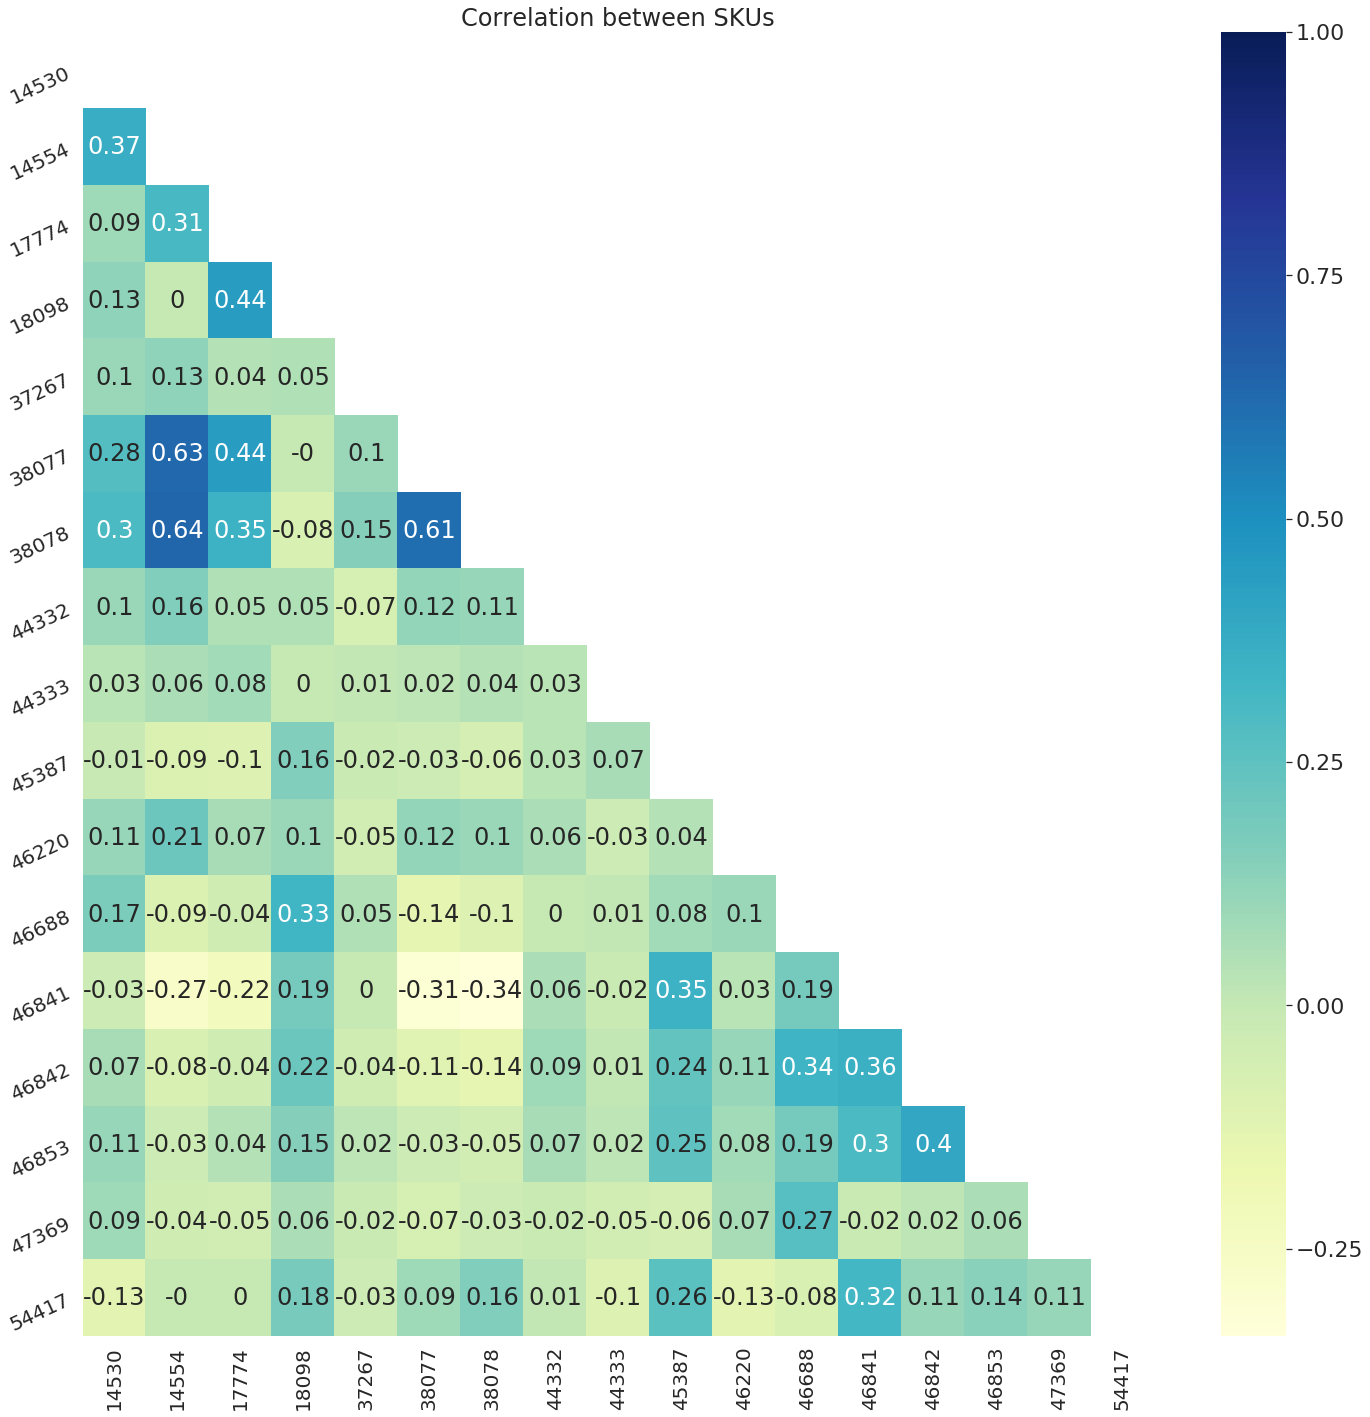

In [38]:
df_skus = pd.DataFrame()
for sku in unique_products:
    df_daily = df[df['product_id'] == sku]
    df_daily_sold = df_daily['units_sold'].groupby(pd.Grouper(freq='D')).sum()
    df_skus[str(sku)] = df_daily_sold

def plot_correlation_heatmap(corr):
    plt.figure(figsize=(24, 24))
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    np.fill_diagonal(mask,True)
    sns.set(font_scale=2)
    with sns.axes_style("white"):
        corr = corr.round(2)
        ax = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, mask=mask, 
                         cmap="YlGnBu", annot=True)
    plt.title('Correlation between SKUs')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20, rotation=25)
    plt.show()

corr = df_skus.corr()
plot_correlation_heatmap(corr)

In [5]:
df[df['product_id'].isin([38077, 38078, 14554])]

,product_id,website,date,units_sold,selling_price,promotion_dummy_1,promotion_dummy_2,brand,main_category_id,parent_category_id
date,,,,,,,,,,
2015-01-01,14554,3,2015-01-01,11,9.90,No,No,5,618,5
2015-01-01,14554,2,2015-01-01,0,10.39,No,No,5,618,5
2015-01-01,14554,1,2015-01-01,0,9.90,No,No,5,618,5
2015-01-02,14554,3,2015-01-02,5,9.90,No,No,5,618,5
2015-01-02,14554,1,2015-01-02,0,9.90,No,No,5,618,5
2015-01-02,14554,2,2015-01-02,0,10.39,No,No,5,618,5
2015-01-03,14554,3,2015-01-03,1,9.90,No,No,5,618,5
2015-01-03,14554,2,2015-01-03,0,10.39,No,No,5,618,5
2015-01-03,14554,1,2015-01-03,0,9.90,No,No,5,618,5


surprising correlation between 14554 and (38077, 38078) as they have quite different prices ~15€ vs ~50€ and belong to different brands and product catogory. Are they often bought together?

## Plot all SKUs over time

In [150]:
def ts_summary_plot(df_daily):
    df_daily_sold = df_daily['units_sold'].groupby(pd.Grouper(freq='D')).sum()

    plt.figure(figsize=(24,16))
    plt.subplot(2,2,1)
    plt.plot(df_daily_sold, '-b')
    plt.title('Units Sold')

    plt.subplot(2,2,2)
    plt.plot(df_daily[(df_daily['website'] == 1)]['units_sold'], '-b', label='website 1', alpha=0.8)
    plt.plot(df_daily[(df_daily['website'] == 2)]['units_sold'], '-r', label='website 2', alpha=0.8)
    plt.plot(df_daily[(df_daily['website'] == 3)]['units_sold'], '-m', label='website 3', alpha=0.8)
    plt.title('Units Sold per Website')
    plt.legend(loc='best', fontsize=15)

    fig, axs = plt.subplots(figsize=(24, 8), nrows=1, ncols=2)
    plot_pacf(df_daily_sold, lags=30, ax=axs[0])
    plot_acf(df_daily_sold, lags=30, ax=axs[1])
    plt.show()

Product_id: 14530 with median price 10.965


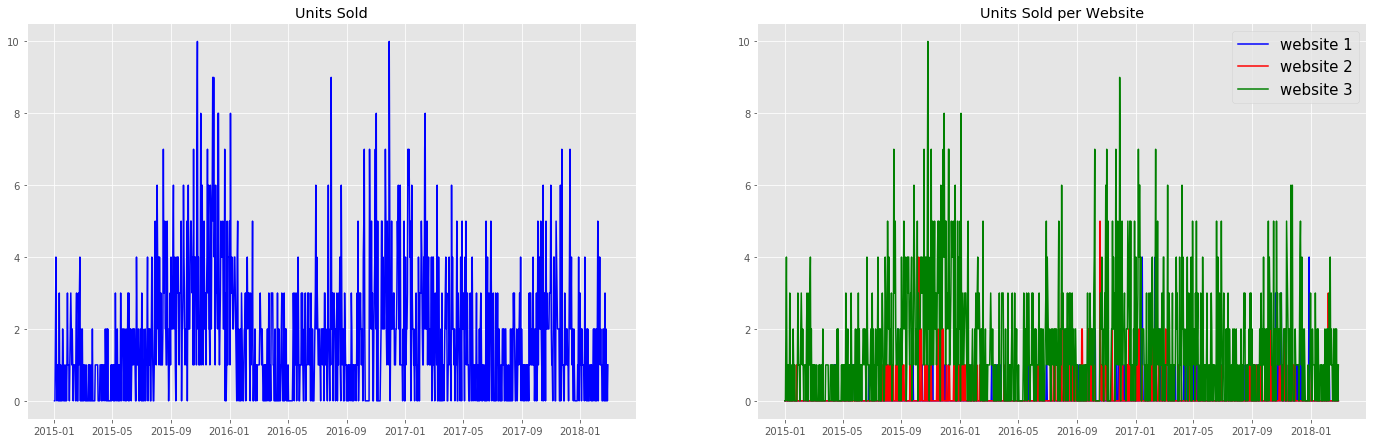

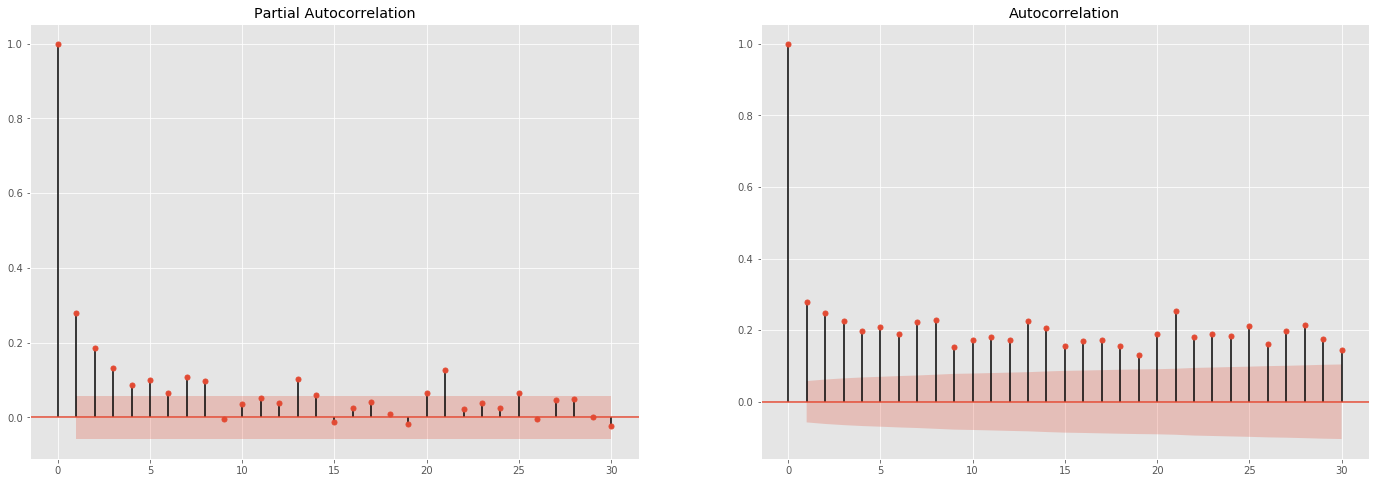

Product_id: 14554 with median price 10.9


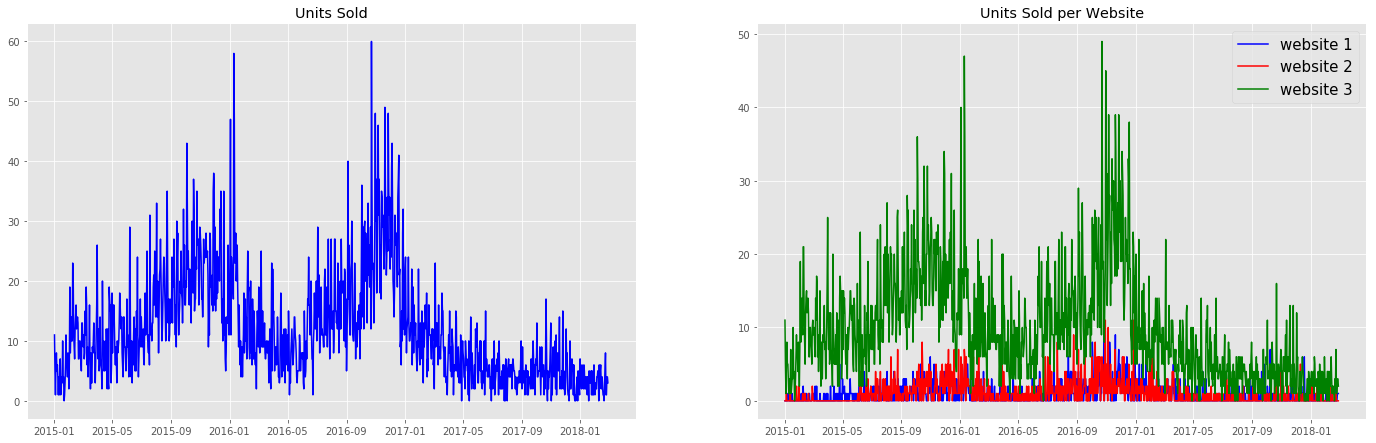

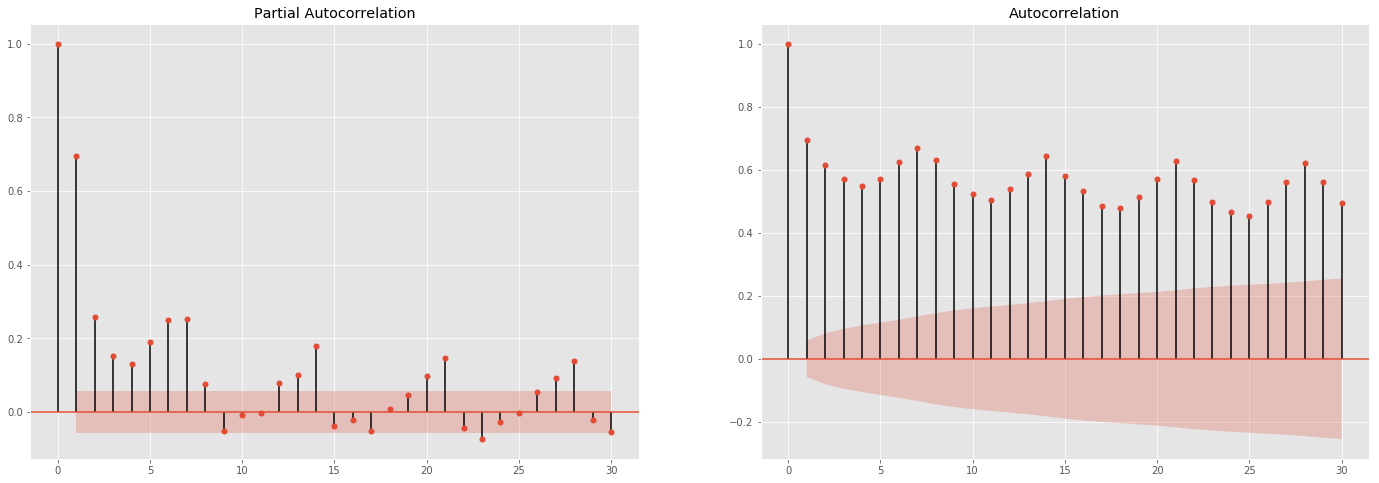

Product_id: 17774 with median price 12.9


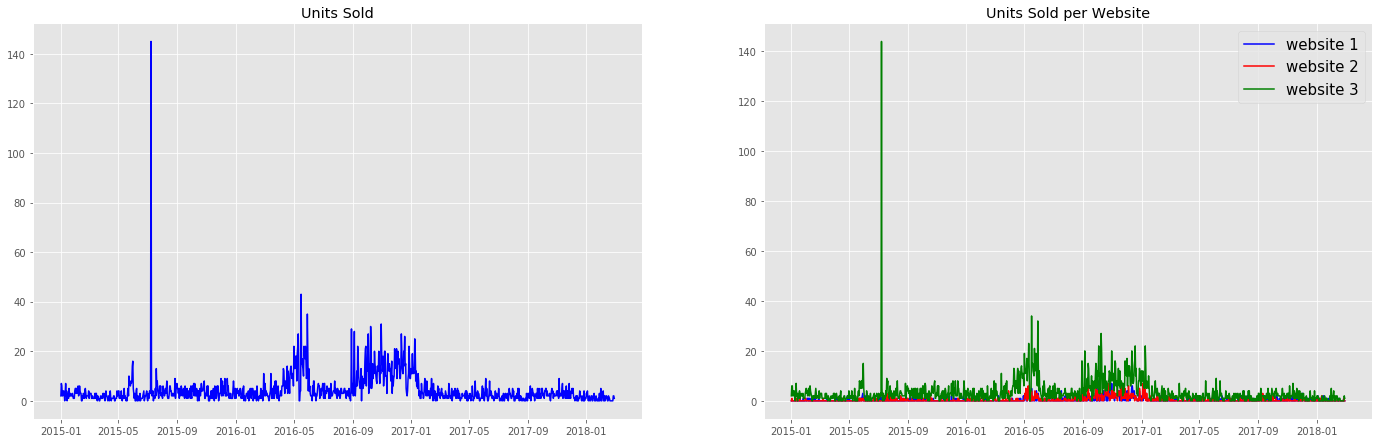

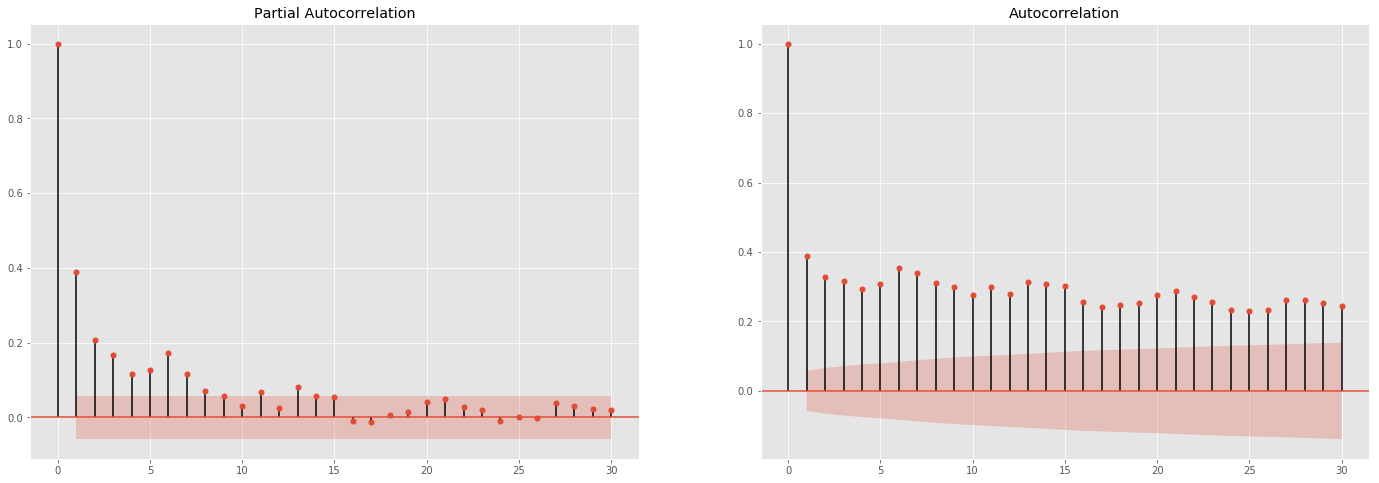

Product_id: 18098 with median price 25.9


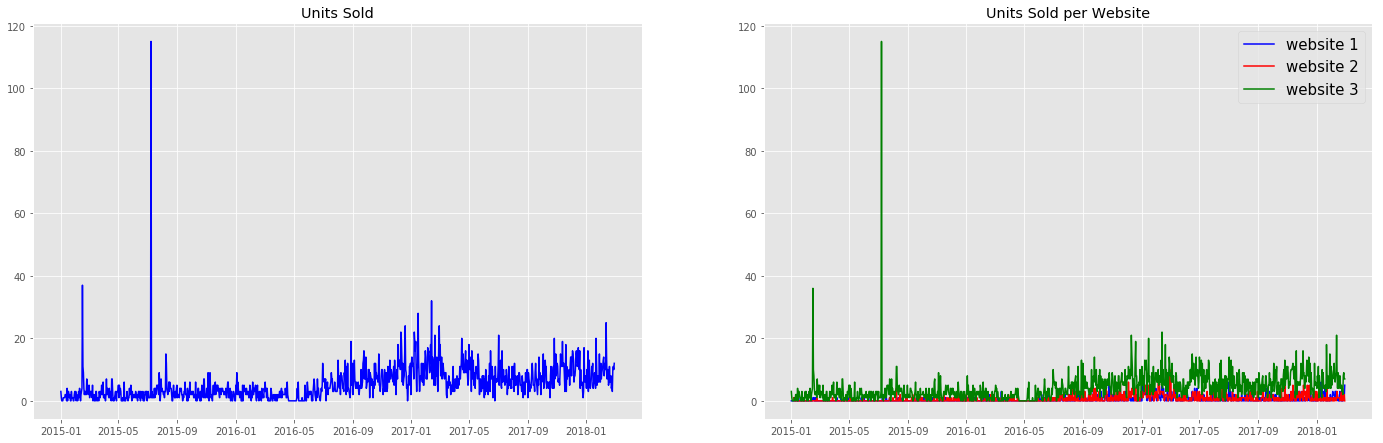

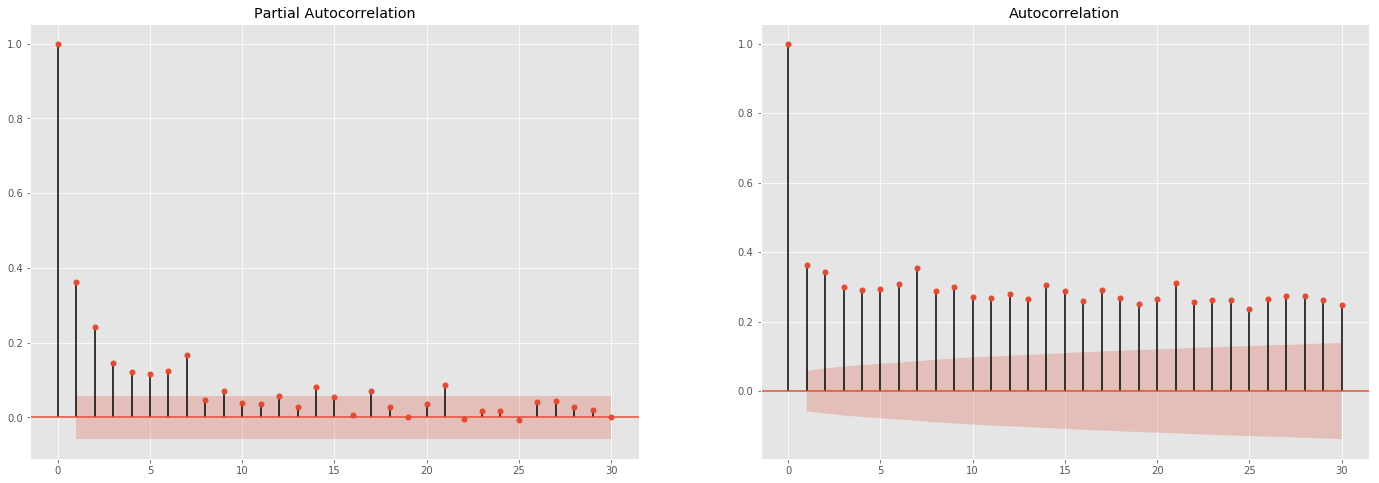

Product_id: 37267 with median price 109.0


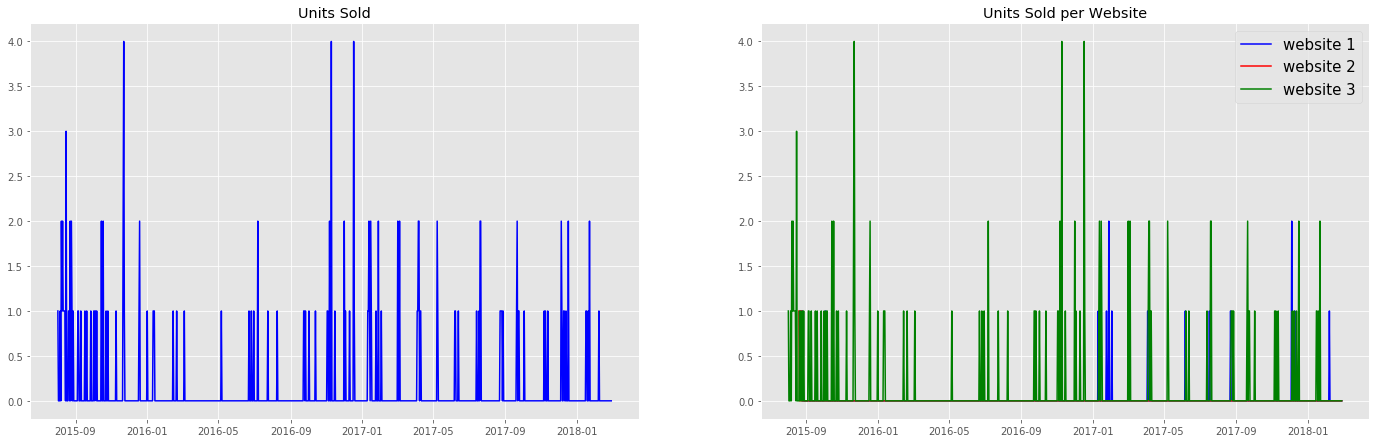

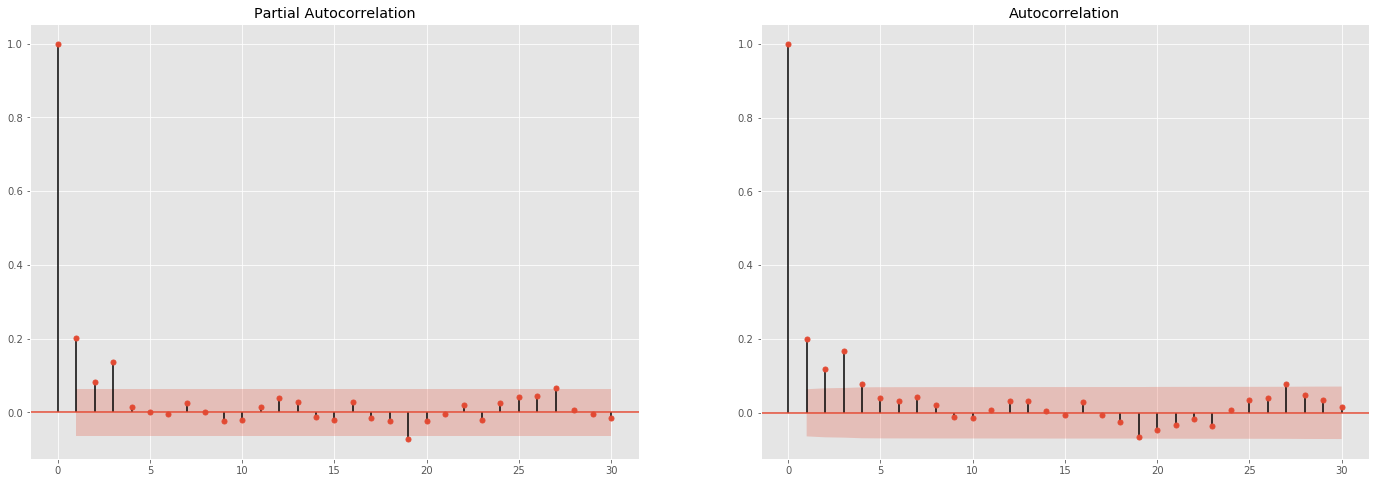

Product_id: 38077 with median price 44.9


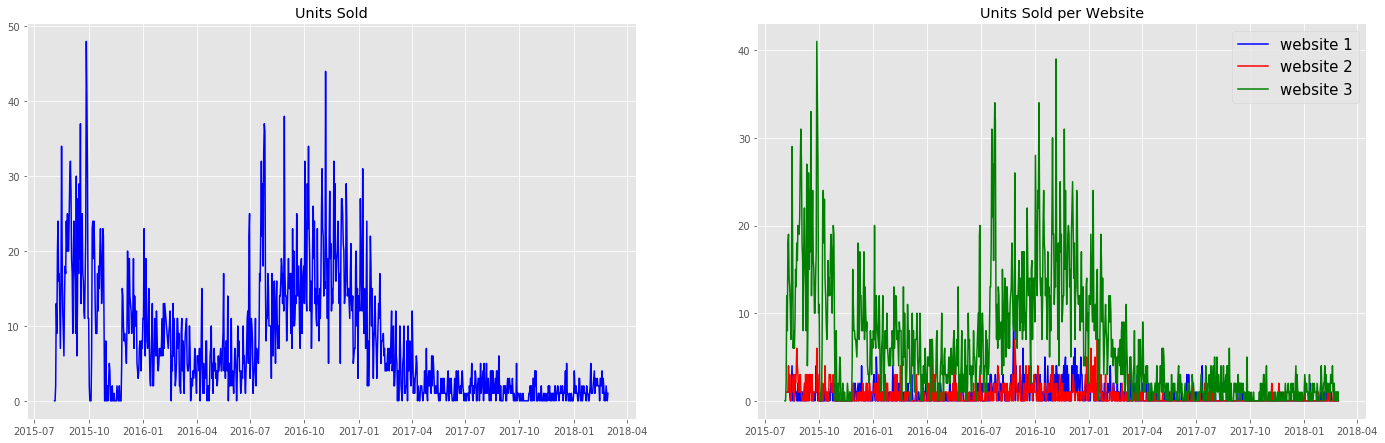

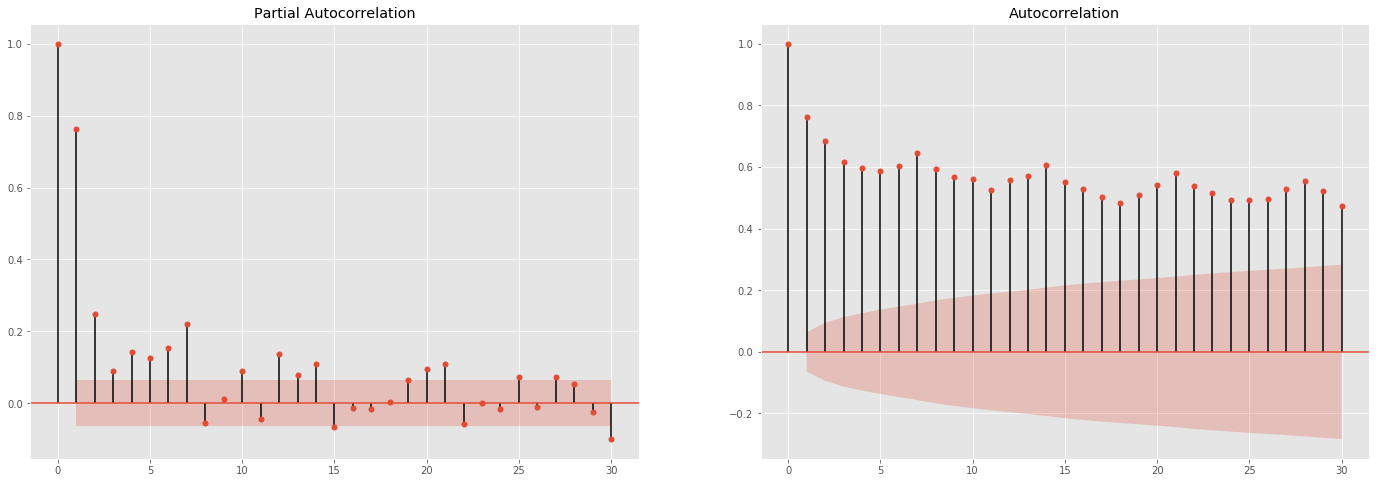

Product_id: 38078 with median price 44.9


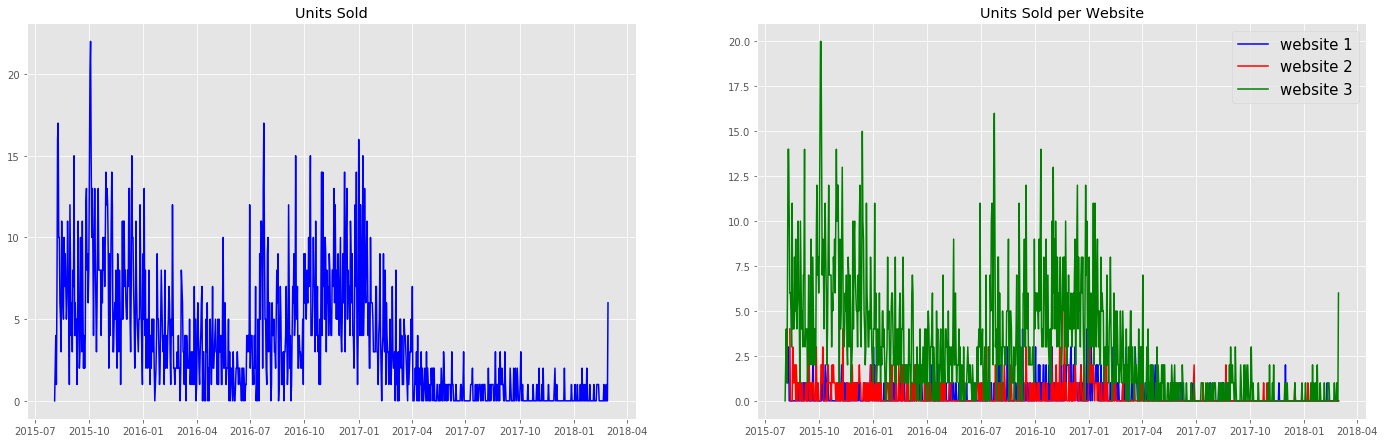

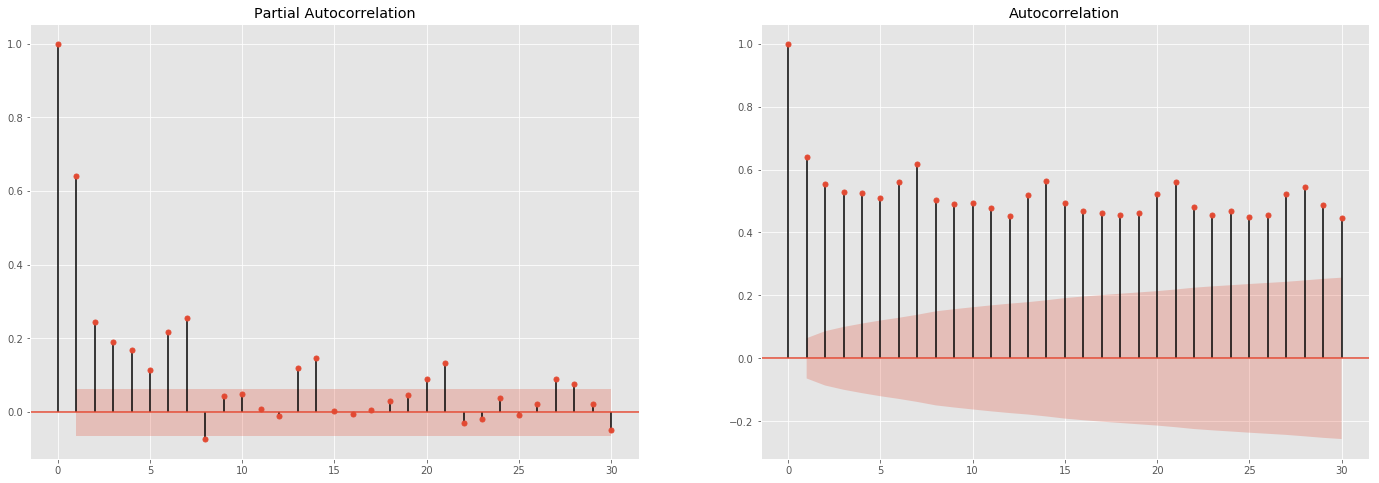

Product_id: 44332 with median price 119.0


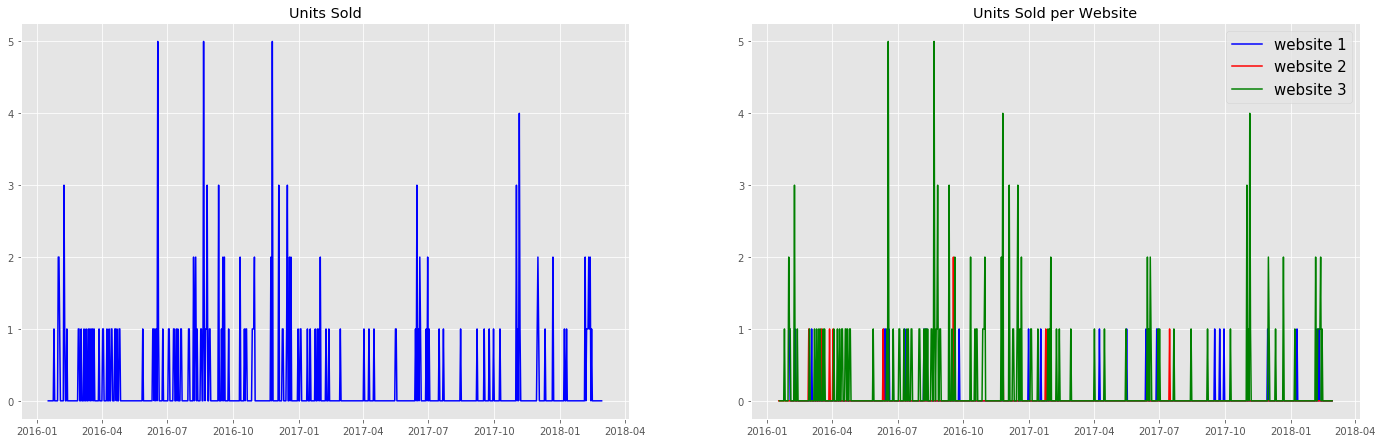

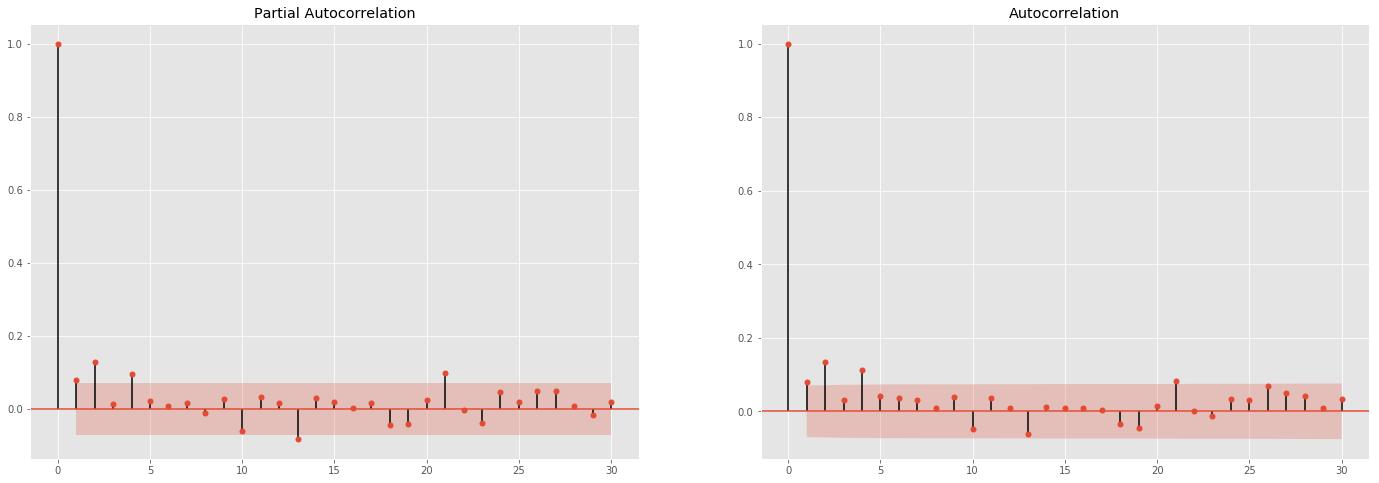

Product_id: 44333 with median price 119.0


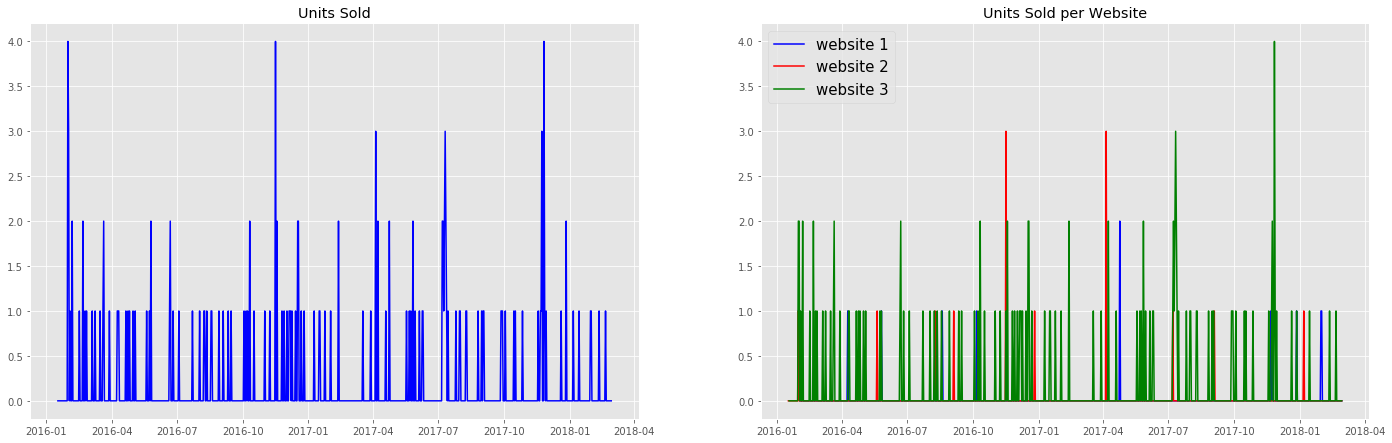

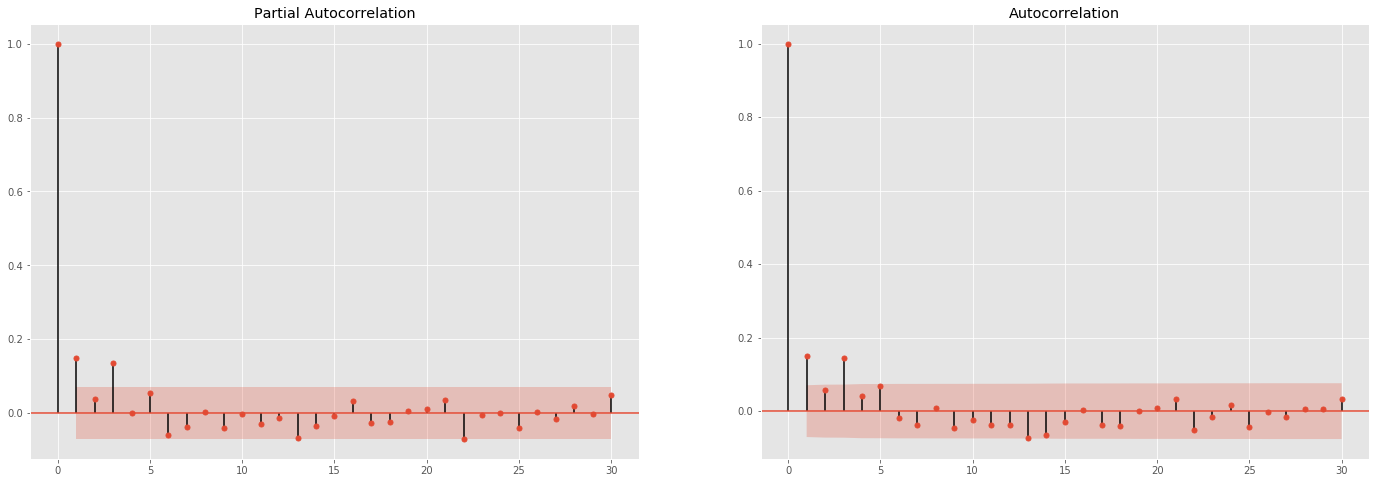

Product_id: 45387 with median price 8.9


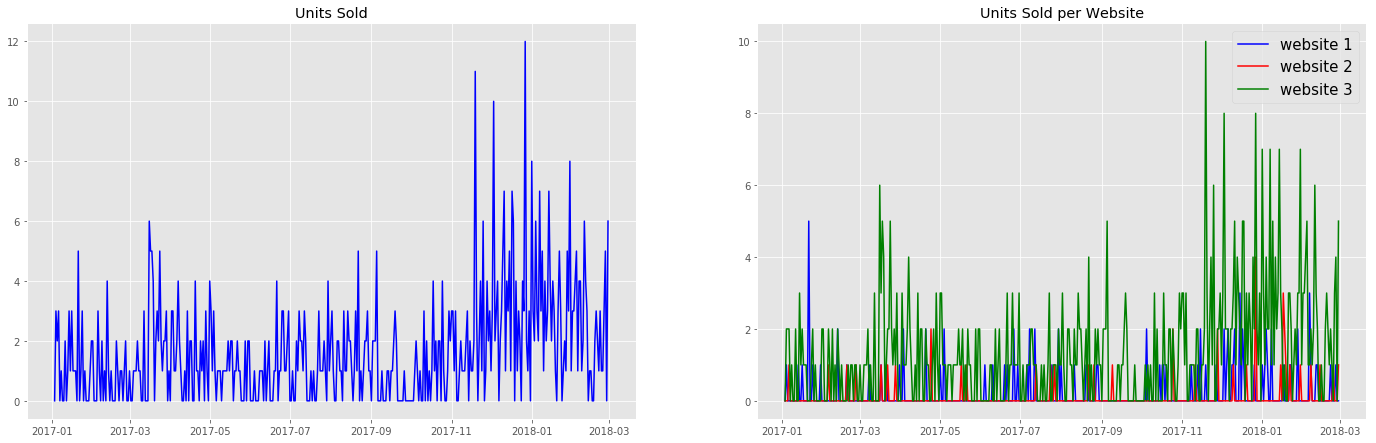

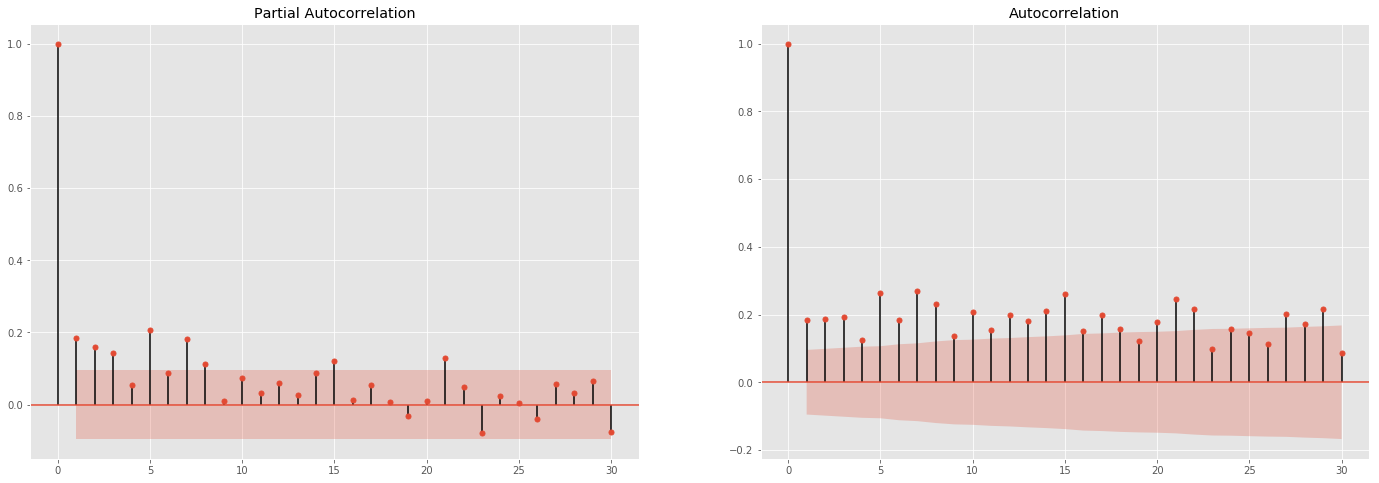

Product_id: 46220 with median price 32.9


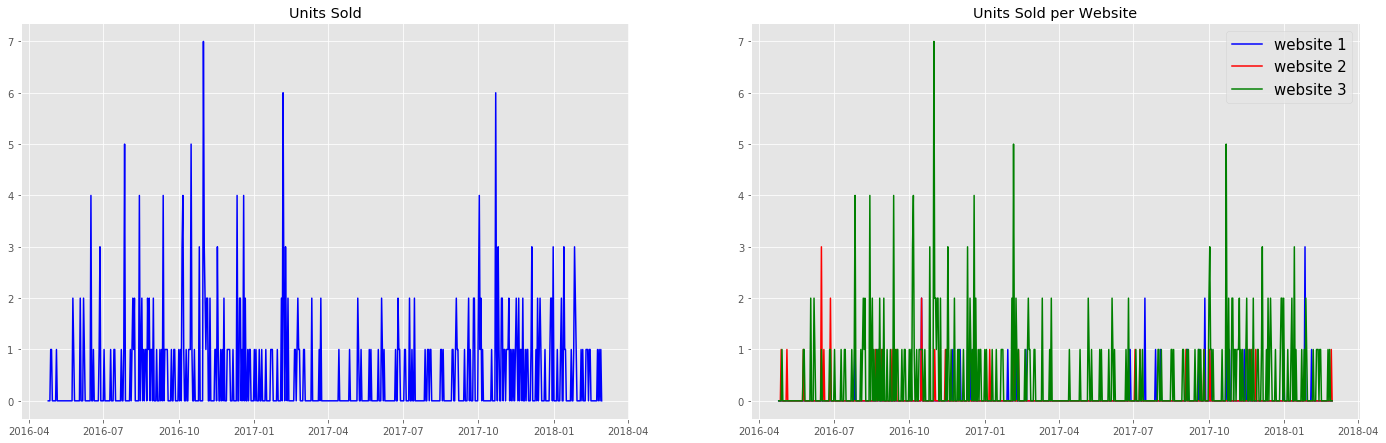

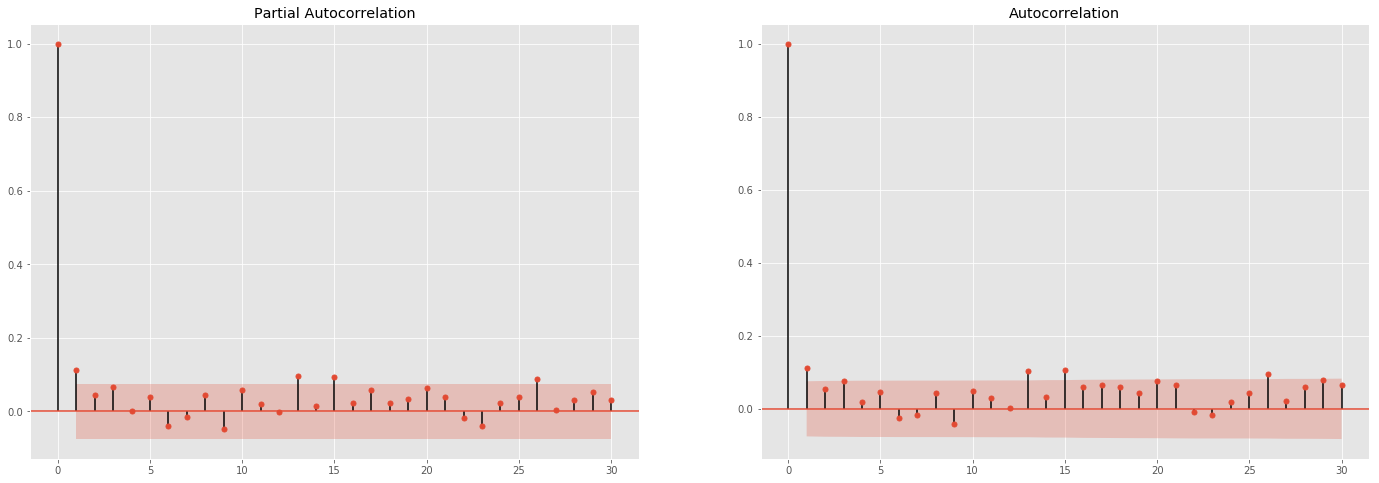

Product_id: 46688 with median price 10.9


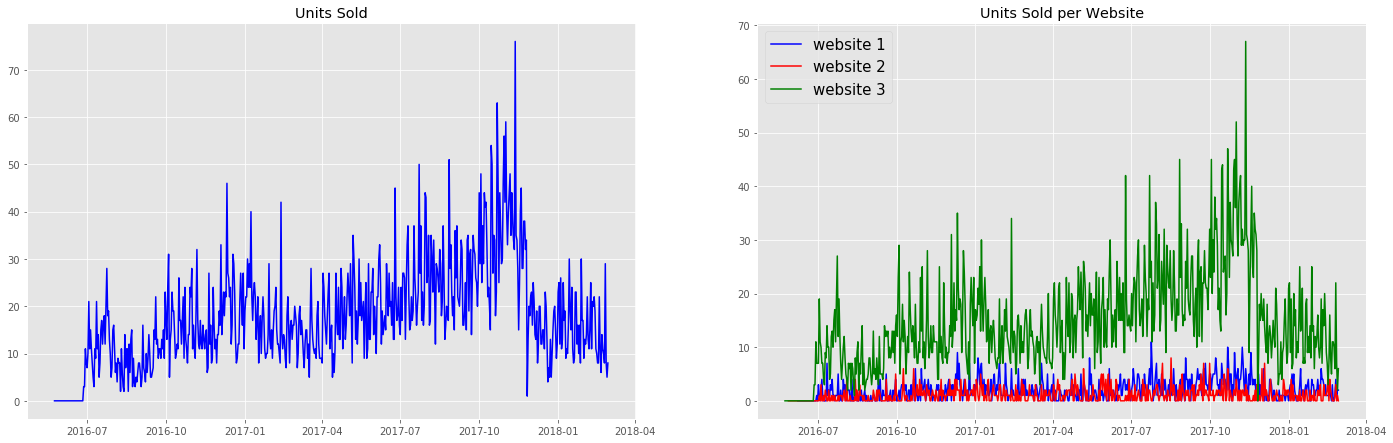

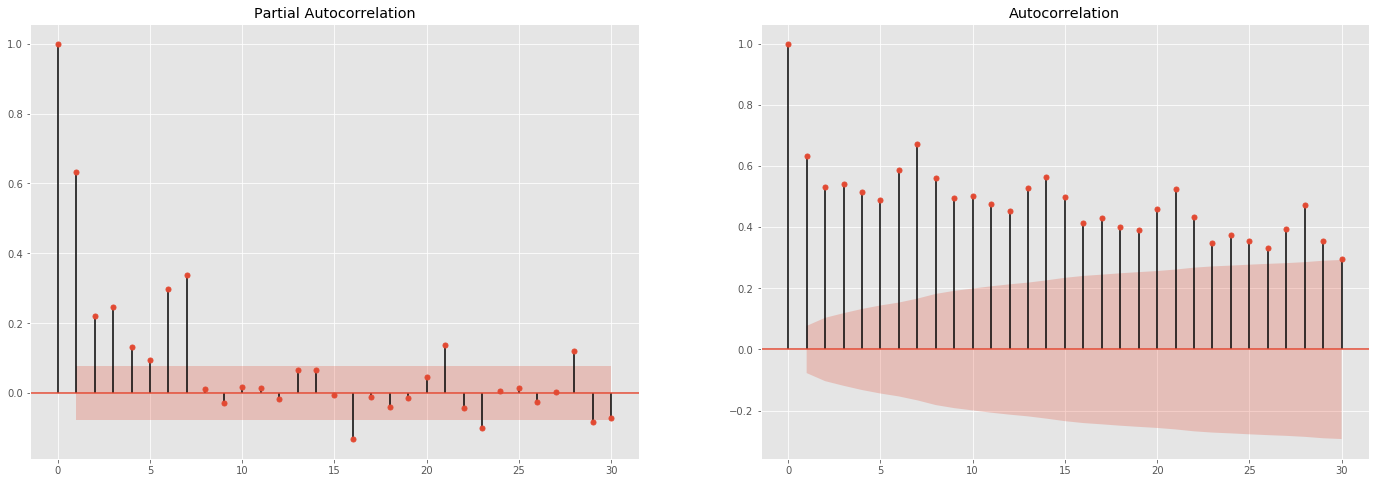

Product_id: 46841 with median price 129.0


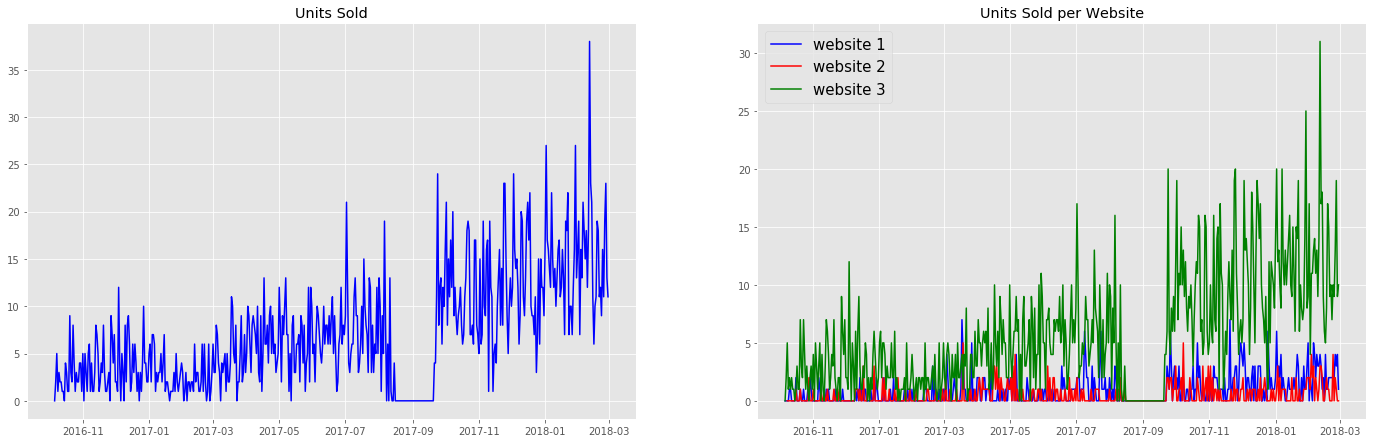

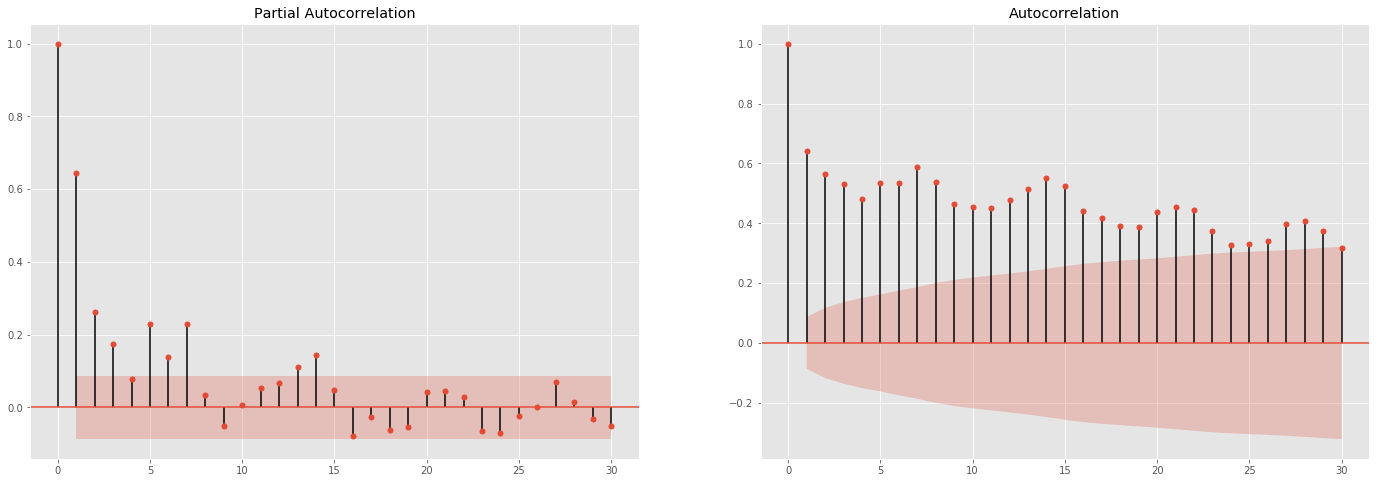

Product_id: 46842 with median price 129.0


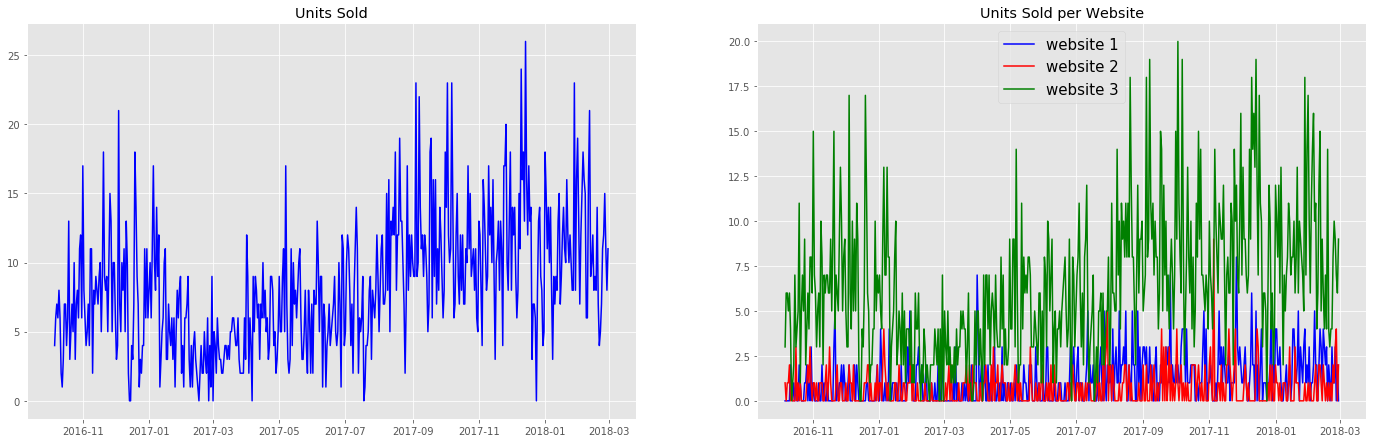

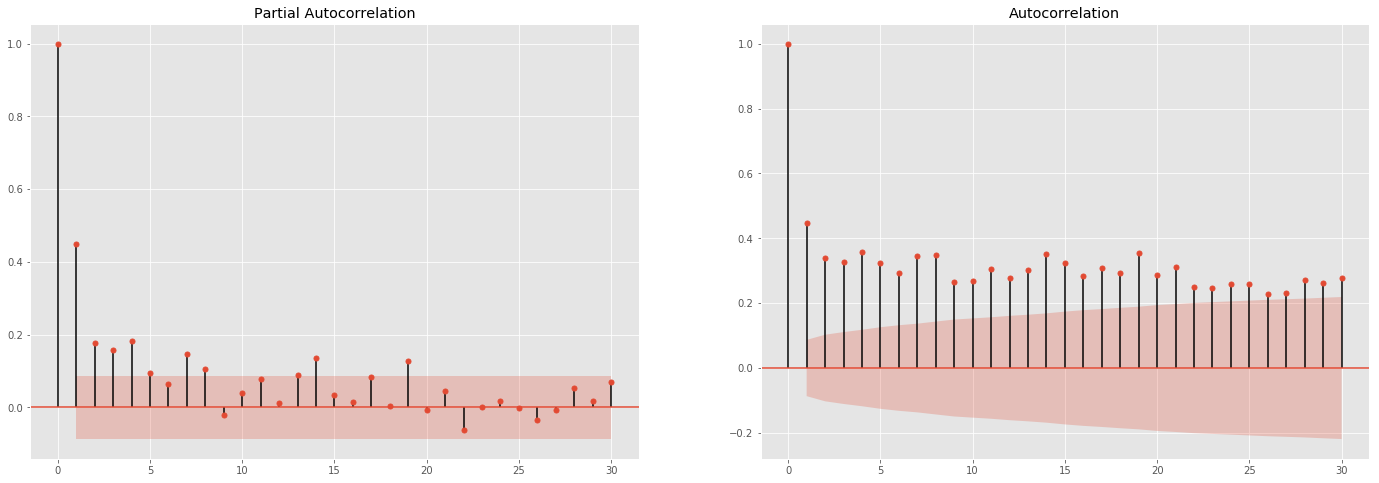

Product_id: 46853 with median price 119.0


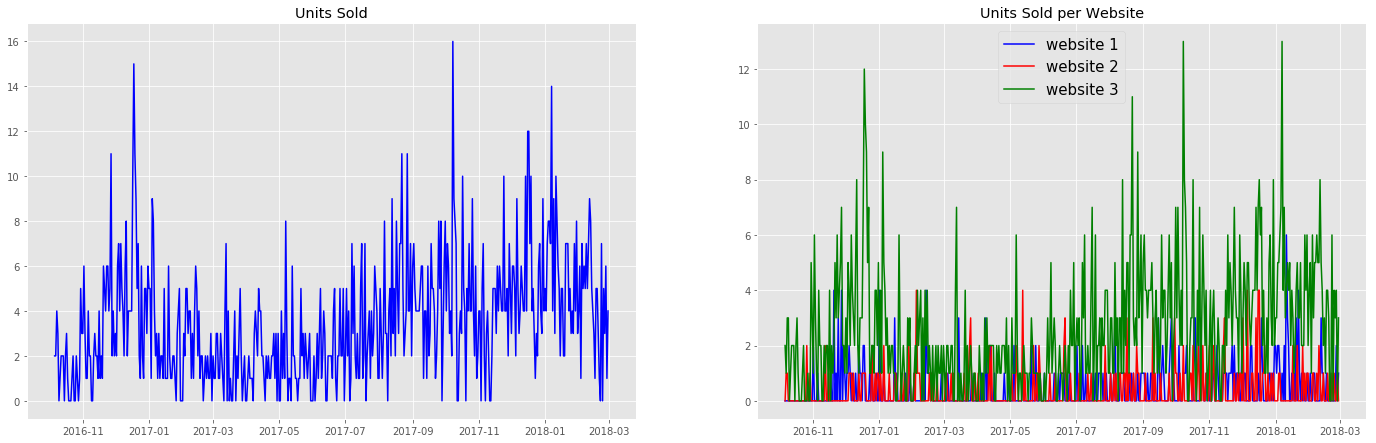

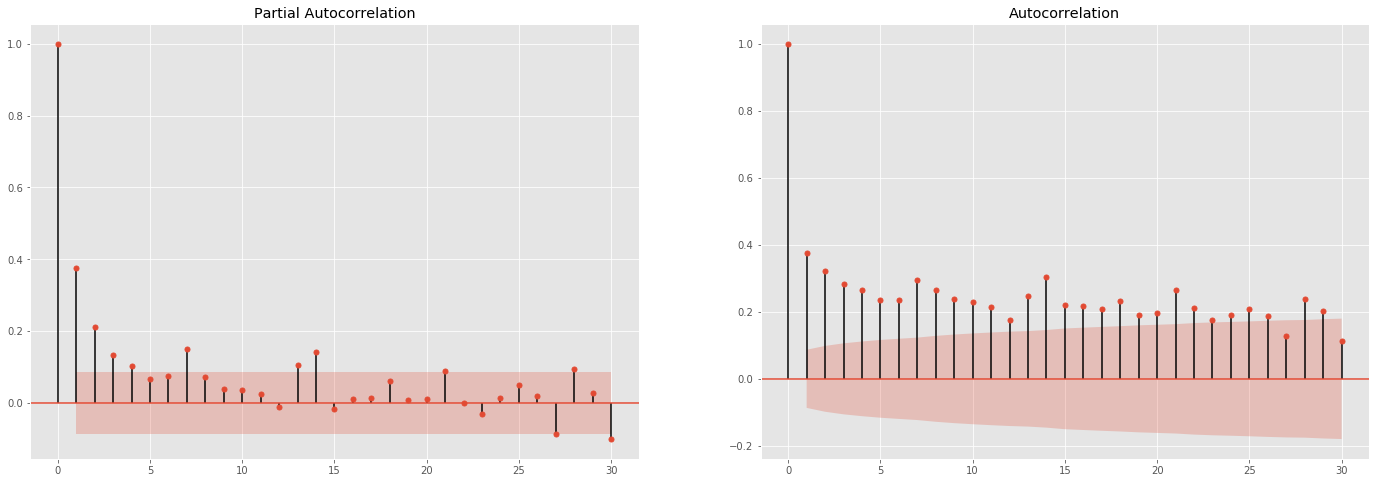

Product_id: 47369 with median price 39.9


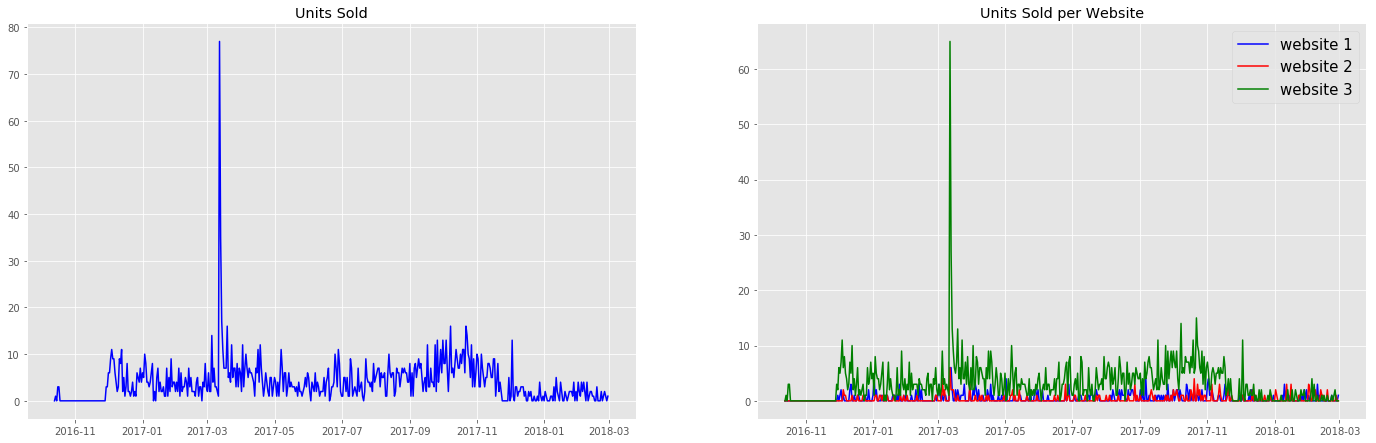

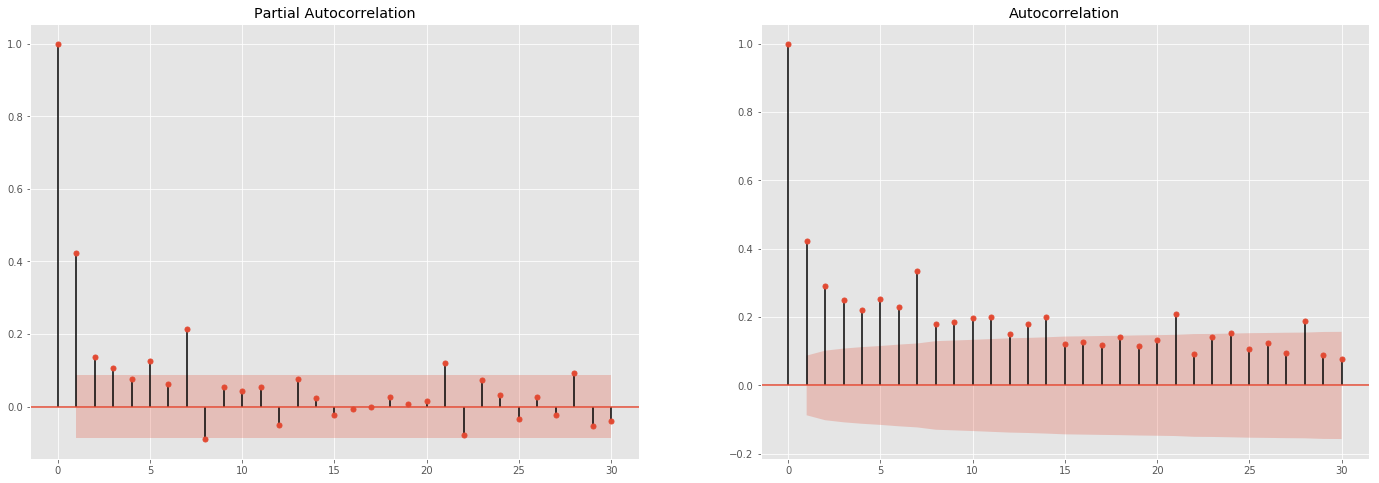

Product_id: 54417 with median price 159.0


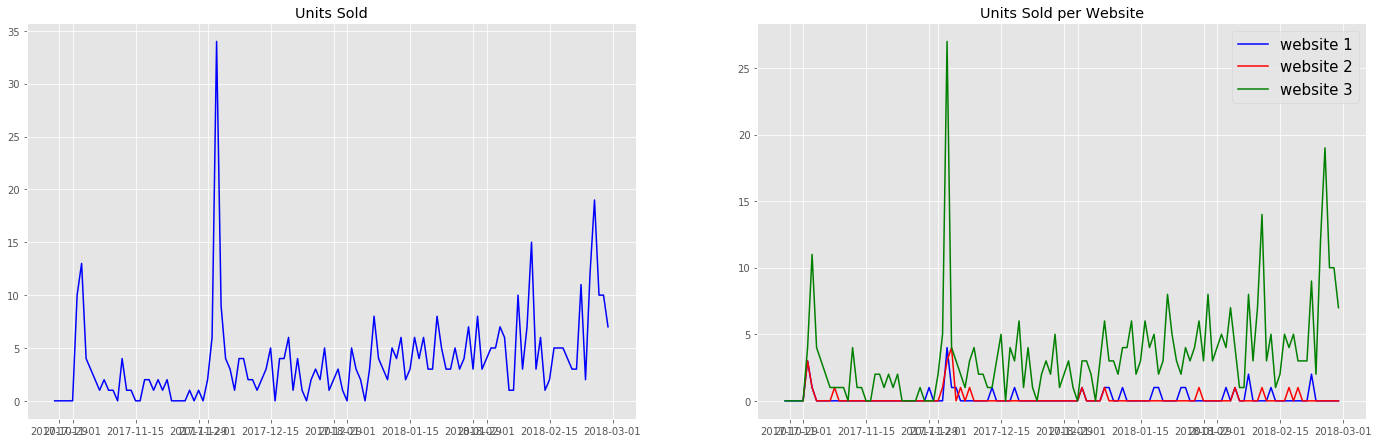

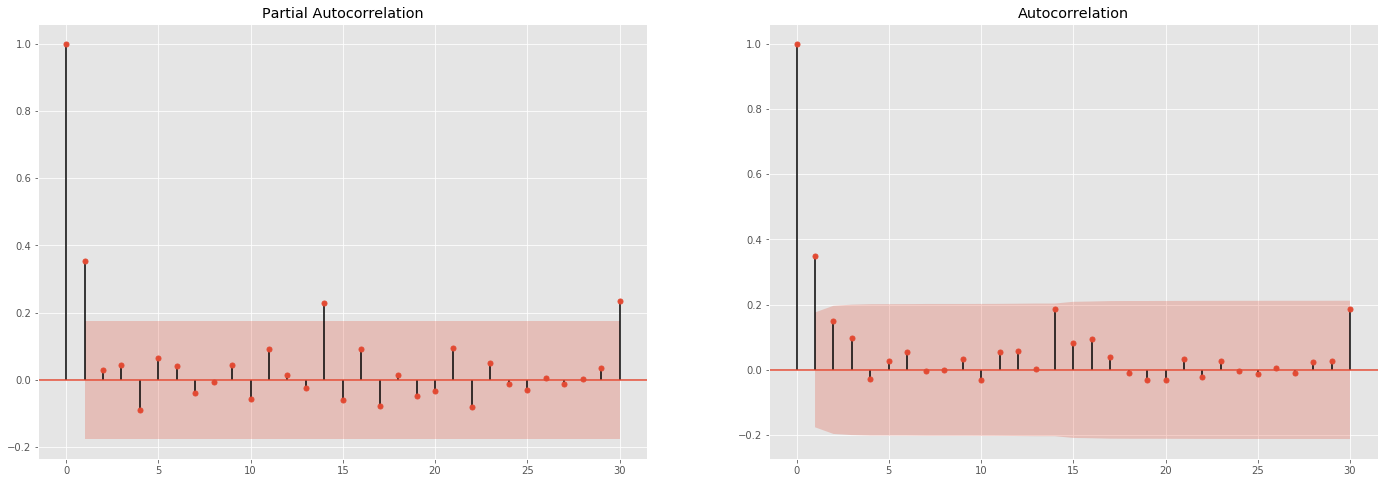

In [142]:
plt.style.use('ggplot')
for product in unique_products:
    df_product = df[df['product_id'] == product]
    print('Product_id: {} with median price {}'.format(product, df_product['selling_price'].median()))
    ts_summary_plot(df_product)

- all 17 timeseries are not stationary (include trend and sesaonality)
- high priced products such as Product_id 44332 might be hard to forecast on the daily basis (with a timeseries model) --> maybe weekly more appropriate
- chrismas peaks

## Try out fbprophet for daily forecasts

In [35]:
from fbprophet import Prophet

df_prophet = pd.DataFrame({'ds': df_daily_sold.index, 'y': df_daily_sold.values})
df_prophet['floor'] = 0.00

n_test = 135
train = df_prophet.iloc[0:df_prophet.shape[0]-n_test]
test = df_prophet.iloc[-(n_test):]
print(train.tail(1))
print(test.head(1))

             ds  y  floor
1019 2017-10-16  6    0.0
             ds  y  floor
1020 2017-10-17  6    0.0


In [36]:
model = Prophet(weekly_seasonality=True, daily_seasonality=True)
model.fit(train)
future = model.make_future_dataframe(periods=test.shape[0])
forecast = model.predict(future)

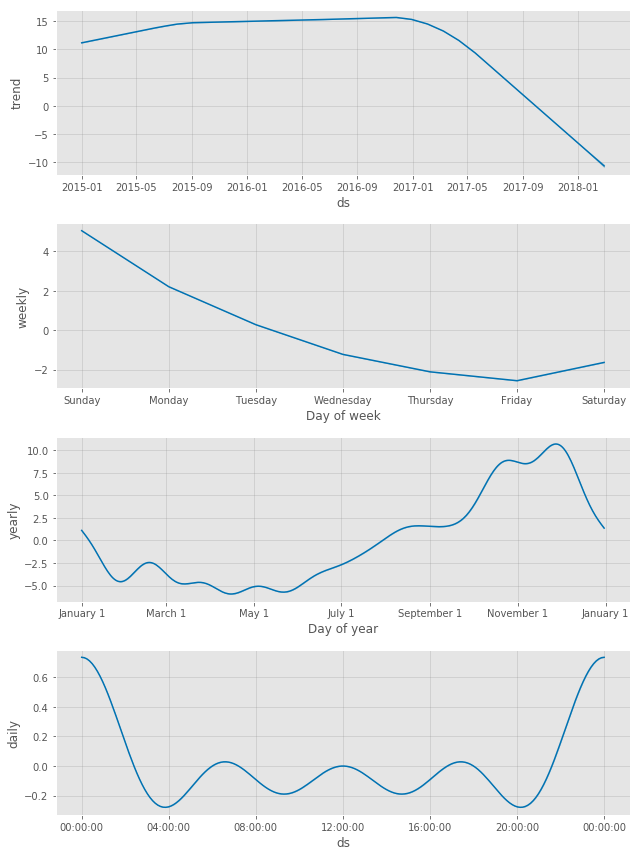

In [27]:
model.plot_components(forecast)
plt.show()

In [30]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

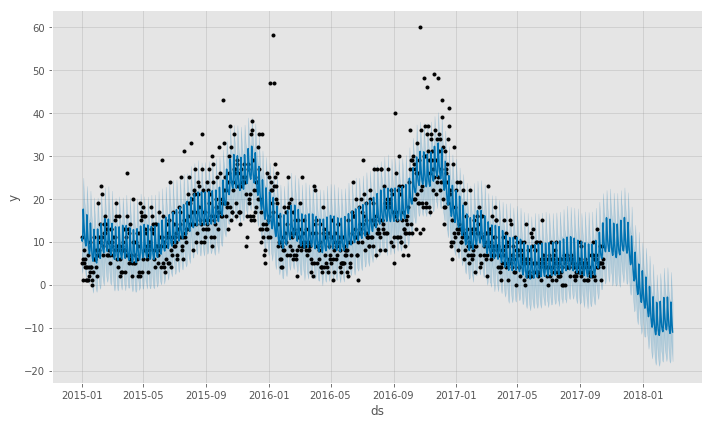

In [37]:
#forecast['y']
model.plot(forecast)
plt.show()

In [34]:
from sklearn.metrics import r2_score
print(r2_score(test['y'], forecast['yhat'].iloc[-n_test:]))

-5.91988461967117


Ok this quick solution did fail :(